## Purpose: Model Comparison

Demonstration: 
    1. Parameter fit
    2. Use of Evidence

Author: Do Kester


import classes

In [10]:
import numpy as numpy
import math

from PolynomialModel import PolynomialModel
from Fitter import Fitter
from Formatter import formatter as fmt
from FitPlot import plotFit
import matplotlib.pyplot as plt

define some constants

In [11]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [27]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

y = ym + sig * numpy.random.randn( N )


define the fitter: Fitter

Polynomial degree  0   blue
Fit params           3.253
    stdev            0.821
    chisq          282.767
    evidence       -29.731
Polynomial degree  1   green
Fit params       [    2.171    2.165]
    stdev        [    0.399    0.250]
    chisq           57.135
    evidence       -25.307
Polynomial degree  2   red
Fit params       [    0.676    1.433    0.732]
    stdev        [    0.238    0.135    0.080]
    chisq           10.169
    evidence       -21.200
Polynomial degree  3   mint
Fit params       [    1.171    0.571    0.348    0.256]
    stdev        [    0.036    0.033    0.016    0.008]
    chisq            0.173
    evidence        -9.295
Polynomial degree  4   magenta
Fit params       [    1.172    0.573    0.346    0.256    0.000]
    stdev        [    0.040    0.049    0.033    0.016    0.007]
    chisq            0.173
    evidence       -13.403
Polynomial degree  5   yellow
Fit params       [    1.180    0.563    0.328    0.265    0.005   -0.002]
    stdev        

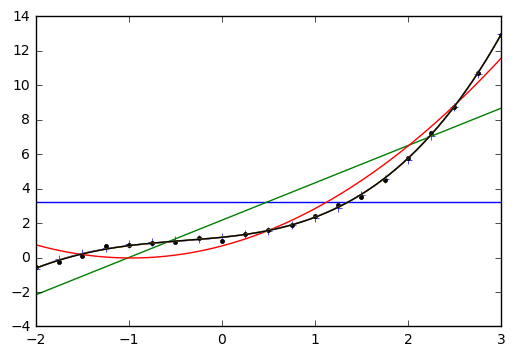

In [32]:
plotFit( x, y, truth=ym, show=False )
yy = numpy.zeros( 7, dtype=float )
xi = numpy.linspace( -2.0, 3.0, 201, dtype=float )
col = ["blue", "green", "red", "mint", "magenta", "yellow", "black"]
for deg in range( 7 ) :
    poly = PolynomialModel( deg )
    np = poly.getNumberOfParameters()
    fitter = Fitter( x, poly )
    param = fitter.fit( y )
    plt.plot( xi, poly( xi ) )

    chisq = fitter.chisq
    stdev = fitter.stdevs
    logpr = fitter.getEvidence( limits=[-100,100], noiseLimits=[0.01,10] )
    print( "Polynomial degree  %d  " % (np-1), col[deg] )
    print( "Fit params      ", fmt( param, max=None ) )
    print( "    stdev       ", fmt( stdev, max=None ) ) 
    print( "    chisq       ", fmt( chisq ) )
    print( "    evidence    ", fmt( logpr ) )
    yy[deg] = logpr
plt.show()

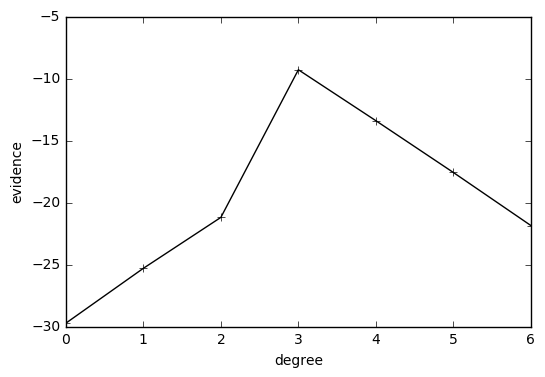

In [34]:
plt.plot( yy, 'k-+' )
plt.xlabel( "degree" )
plt.ylabel( "evidence" )
plt.show()